In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

input_shape = (128, 128, 3)  
num_classes = 2 

# Buat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

# Kompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Siapkan data menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
train_generator = train_datagen.flow_from_directory(
    'C:/Users/user/Downloads/Riped and Unriped Tomato Dataset',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'C:/Users/user/Downloads/Riped and Unriped Tomato Dataset',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Latih model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Simpan model
save_path = 'D:/ml/tomato_ripeness_cnn_model.keras'
model.save(save_path)

Found 142 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


d:\Phyton\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 925ms/step - accuracy: 0.5022 - loss: 1.1556 - val_accuracy: 0.5429 - val_loss: 0.6414
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - accuracy: 0.6947 - loss: 0.4341 - val_accuracy: 0.8857 - val_loss: 0.3723
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.9761 - loss: 0.2166 - val_accuracy: 0.8857 - val_loss: 0.5777
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.9766 - loss: 0.1818 - val_accuracy: 0.8857 - val_loss: 0.4529
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.9316 - loss: 0.3218 - val_accuracy: 0.9143 - val_loss: 0.2915
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.9484 - loss: 0.1210 - val_accuracy: 0.9143 - val_loss: 0.2613
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.9800 - loss: 0.0861 - val_accuracy: 0.9143 - val_loss: 0.2508
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 503ms/step - accuracy: 0.9713 - loss: 0.0953 - val_accuracy: 0.8857 - val_loss:

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load model yang telah dilatih
model = load_model('D:/ml/tomato_ripeness_cnn_model.keras')

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi gambar
test_generator = test_datagen.flow_from_directory(
    'C:/Users/user/Downloads/CNN',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

# Evaluasi model
scores = model.evaluate(test_generator)
print(f"Accuracy: {scores[1] * 100:.2f}%")

# Prediksi pada data uji
test_generator.reset()
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes

# Hitung precision, recall, dan F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Tampilkan classification report dan confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9000 - loss: 1.4939


d:\Phyton\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Accuracy: 90.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Precision: 0.92
Recall: 0.90
F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

        Ripe       0.83      1.00      0.91        10
      Unripe       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20


Confusion Matrix:
[[10  0]
 [ 2  8]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Ripe, Scores: [1.000000e+00 6.233363e-19]


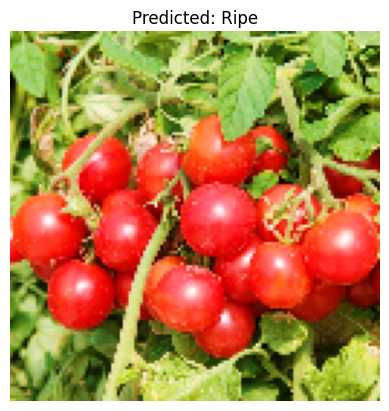

In [23]:
# Prediksi gambar individu
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Fungsi untuk memprediksi gambar individu
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in test_generator.class_indices.items()}
    class_name = class_labels[class_idx]
    return class_name, prediction[0]

# Contoh penggunaan prediksi gambar individu
img_path = 'C:/Users/user/Downloads/Tomato-Cherry-Falls.png'
predicted_class, prediction_scores = predict_image(img_path, model)
print(f"Predicted class: {predicted_class}, Scores: {prediction_scores}")

# Plot gambar dan hasil prediksi
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: Unripe, Scores: [0.0170128  0.98298717]


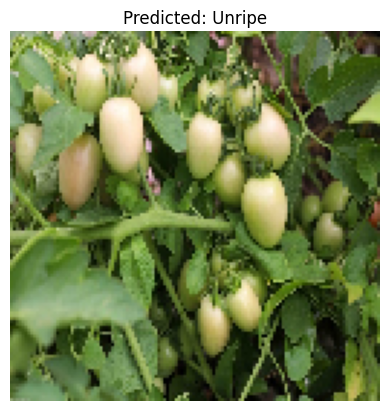

In [24]:
# Prediksi gambar individu
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Fungsi untuk memprediksi gambar individu
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in test_generator.class_indices.items()}
    class_name = class_labels[class_idx]
    return class_name, prediction[0]

# Contoh penggunaan prediksi gambar individu
img_path = 'C:/Users/user/Downloads/unrip.jpg'
predicted_class, prediction_scores = predict_image(img_path, model)
print(f"Predicted class: {predicted_class}, Scores: {prediction_scores}")

# Plot gambar dan hasil prediksi
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()